# 数据读取

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from sklearn.cluster import KMeans
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.knn import KNN
from pyod.models.ocsvm import OCSVM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签SimHei
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

# 数据丢失

In [2]:
data_loss = pd.read_csv("../data/数据丢失.csv", encoding="gbk")
data_loss.to_pickle("../data/数据丢失.pkl")
data_loss.head(5)

,时间,定子线棒温度℃,标签
0,2023.09.17 00:00,71.42,1
1,2023.09.17 00:01,87.80,1
2,2023.09.17 00:02,82.22,1
3,2023.09.17 00:03,70.26,1
4,2023.09.17 00:04,45.78,1


In [73]:
data_loss.shape

(1260, 3)

## 时序图

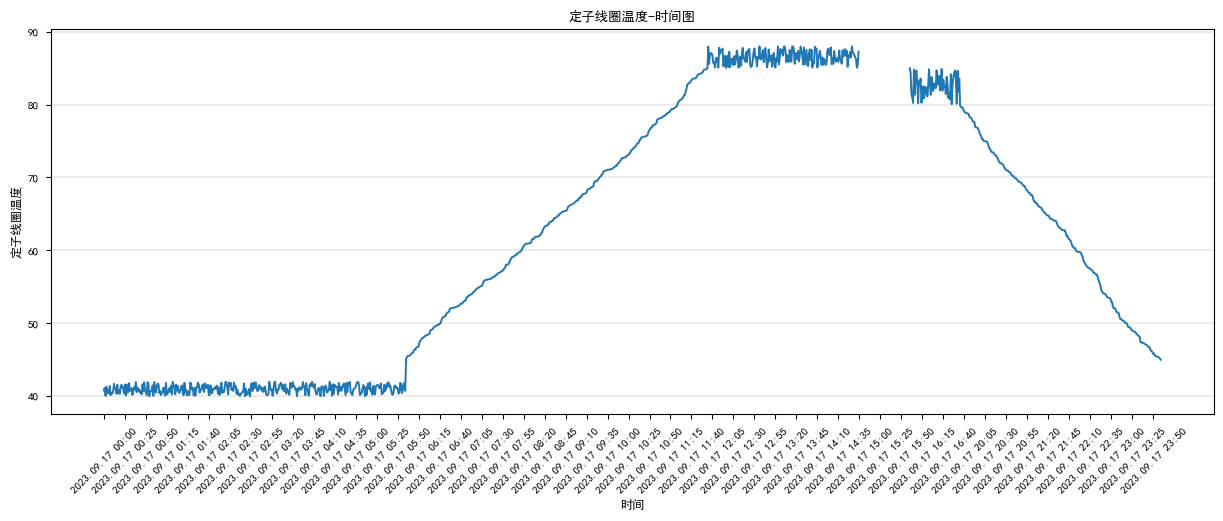

In [74]:
X1 = data_loss['时间']
y11 = data_loss['定子线棒温度℃']
fig = plt.figure(1, (15, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(X1,y11,linestyle='-')
plt.xlabel('时间')
plt.ylabel('定子线圈温度')
my_x_ticks = np.arange(0,len(X1),25)#设置横坐标间隔为10
plt.xticks(my_x_ticks, rotation = 45)#rotation文字旋转方向
plt.title('定子线圈温度-时间图')#图标题
plt.grid(axis = 'y',linewidth=0.35)#绘制网格
plt.style.use('seaborn-v0_8-paper')#绘制背景色
plt.savefig("../image/数据丢失-定子线圈温度-时间图.png", dpi=600)
plt.show()

## 直方图

In [18]:
#选择合适的数据
data = data_loss.iloc[:,1:].values

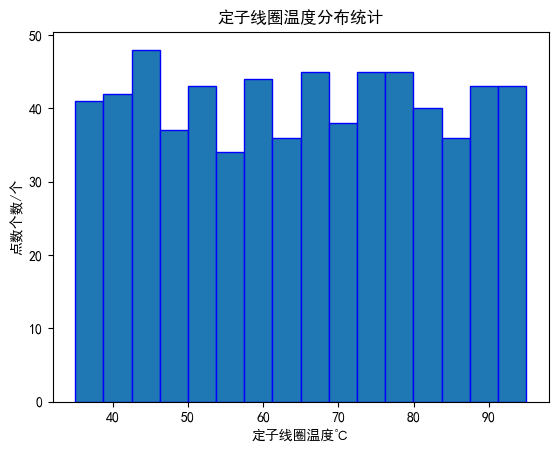

In [19]:
plt.hist(data[:,0], bins=16, edgecolor="b")
plt.title("定子线圈温度分布统计")
plt.xlabel("定子线圈温度℃")
plt.ylabel("点数个数/个")
plt.savefig("../image/数据丢失-定子线圈温度分布统计.png", dpi=600)
plt.show()

# 数据失效

In [97]:
data_failure = pd.read_csv("../data/数据失效.csv", encoding="gbk")
data_failure.to_pickle("../data/数据失效.pkl")
data_failure.head(5)

,时间,调速器油管油位/mm,油泵启动信号
0,2023.09.01 00:00:00,409.03,1.0
1,2023.09.01 00:00:02,428.03,NaN
2,2023.09.01 00:00:04,429.60,NaN
3,2023.09.01 00:00:06,432.79,NaN
4,2023.09.01 00:00:08,434.33,NaN


In [98]:
data_failure.shape

(336, 3)

In [99]:
data_failure[data_failure['油泵启动信号']==1.0]

,时间,调速器油管油位/mm,油泵启动信号
0,2023.09.01 00:00:00,409.03,1.0
16,2023.09.01 07:00:00,408.28,1.0
32,2023.09.01 14:00:00,403.61,1.0
48,2023.09.01 22:00:00,400.63,1.0
64,2023.09.02 07:00:00,409.56,1.0
80,2023.09.02 16:00:00,407.80,1.0
96,2023.09.02 23:00:00,414.93,1.0
112,2023.09.03 06:00:00,411.92,1.0
128,2023.09.03 14:00:00,407.34,1.0
144,2023.09.03 23:00:00,409.90,1.0


In [100]:
lit = list(data_failure[data_failure['油泵启动信号']==1.0].index)
lit

[0,
 16,
 32,
 48,
 64,
 80,
 96,
 112,
 128,
 144,
 160,
 176,
 192,
 208,
 224,
 240,
 256,
 272,
 288,
 304,
 320]

## 时序图

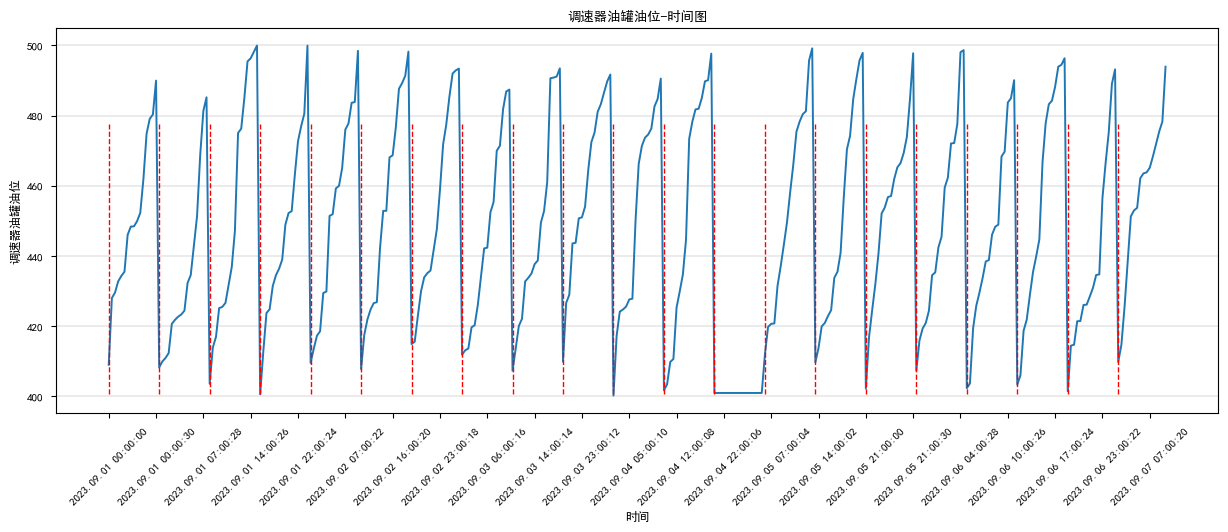

In [104]:
X1 = data_failure['时间']
y11 = data_failure['调速器油管油位/mm']
fig = plt.figure(1, (15, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(X1,y11,linestyle='-')
plt.xlabel('时间')
plt.ylabel('调速器油罐油位')
my_x_ticks = np.arange(0,len(X1),15)#设置横坐标间隔为10
plt.xticks(my_x_ticks, rotation = 45)#rotation文字旋转方向
plt.title('调速器油罐油位-时间图')#图标题
plt.grid(axis = 'y',linewidth=0.35)#绘制网格
plt.style.use('seaborn-v0_8-paper')#绘制背景色
# for i in range(0,len(data_failure),12615):
#     plt.axvline(data_failure['时间'][i],color = 'red',linestyle = '--',lw = 1,ymin = 0.05,ymax = 0.75)#设置参考线
#     plt.annotate(data_failure['时间'][i],xy = (data_failure['时间'][i],110),rotation = 90)#添加注释，xy为文本放置位置
for i in lit:
    plt.axvline(data_failure['时间'][i],color = 'red',linestyle = '--',lw = 1,ymin = 0.05,ymax = 0.75)#设置参考线
    plt.annotate(data_failure['时间'][i],xy = (data_failure['时间'][i],110),rotation = 90)#添加注释，xy为文本放置位置

plt.savefig("../image/数据失效-调速器油罐油位-时间图.png", dpi=600)
plt.show()

## 直方图

In [21]:
#选择合适的数据
data = data_failure.iloc[:,1:].values

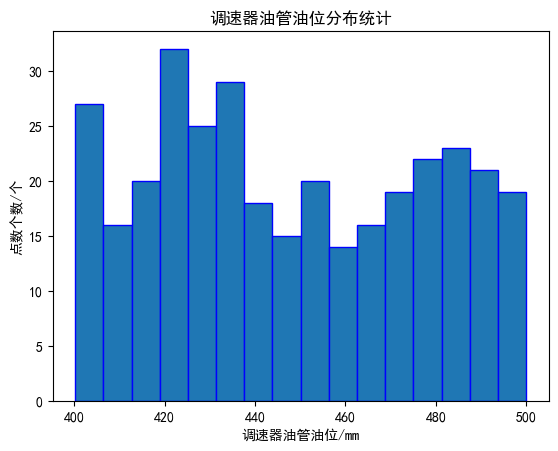

In [22]:
plt.hist(data[:,0], bins=16, edgecolor="b")
plt.title("调速器油管油位分布统计")
plt.xlabel("调速器油管油位/mm")
plt.ylabel("点数个数/个")
plt.savefig("../image/数据失效-调速器油管油位分布统计.png", dpi=600)
plt.show()

# 数据延迟

In [84]:
data_delay = pd.read_csv("../data/数据延迟.csv", encoding="gbk")
data_delay.to_pickle("../data/数据延迟.pkl")
data_delay.head(5)

,时间,定子线棒温度℃,标签
0,2023.09.17 00:00,40.59,1
1,2023.09.17 00:01,40.94,1
2,2023.09.17 00:02,41.67,1
3,2023.09.17 00:03,41.89,1
4,2023.09.17 00:04,41.61,1


In [85]:
data_delay.shape

(960, 3)

## 时序图

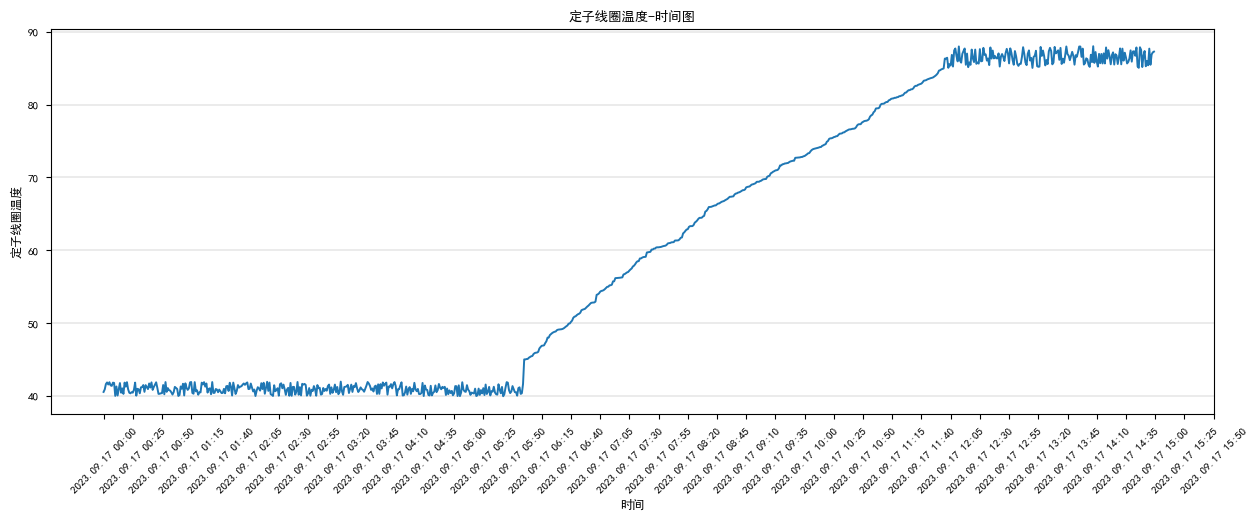

In [86]:
X1 = data_delay['时间']
y11 = data_delay['定子线棒温度℃']
fig = plt.figure(1, (15, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(X1,y11,linestyle='-')
plt.xlabel('时间')
plt.ylabel('定子线圈温度')
my_x_ticks = np.arange(0,len(X1),25)#设置横坐标间隔为10
plt.xticks(my_x_ticks, rotation = 45)#rotation文字旋转方向
plt.title('定子线圈温度-时间图')#图标题
plt.grid(axis = 'y',linewidth=0.35)#绘制网格
plt.style.use('seaborn-v0_8-paper')#绘制背景色
plt.savefig("../image/数据延迟-定子线圈温度-时间图.png", dpi=600)
plt.show()

## 直方图

In [24]:
#选择合适的数据
data = data_delay.iloc[:,1:].values

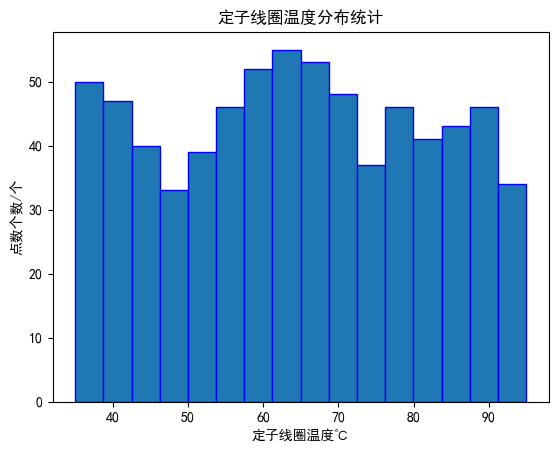

In [25]:
plt.hist(data[:,0], bins=16, edgecolor="b")
plt.title("定子线圈温度分布统计")
plt.xlabel("定子线圈温度℃")
plt.ylabel("点数个数/个")
plt.savefig("../image/数据延迟-定子线圈温度分布统计.png", dpi=600)
plt.show()